# MLOps EDA
## Credit Risk Classification — Analysis of the South German Credit Dataset



#Libraries

In [1]:
# =============================================================
# Instalar dependencias necesarias
# =============================================================
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.7 MB/s eta 0:00:00


In [2]:
# =============================================================
# Google Colab específicos
# =============================================================
from google.colab import userdata
from google.colab import drive

# =============================================================
# Manejo de datos y sistema
# =============================================================
import pandas as pd
import numpy as np
import sys
import os

# =============================================================
# Visualización
# =============================================================
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================================
# Preprocesamiento y transformación
# =============================================================
from sklearn.model_selection import (
    train_test_split, cross_validate, cross_val_predict,
    StratifiedKFold, RepeatedStratifiedKFold
)
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# =============================================================
# Modelos clásicos
# =============================================================
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# =============================================================
# Métricas y evaluación
# =============================================================
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer
)

# =============================================================
# Balanceo de clases
# =============================================================
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.metrics import geometric_mean_score

# =============================================================
# Codificación categórica
# =============================================================
import category_encoders as ce

# =============================================================
# XGBoost
# =============================================================
from xgboost import XGBClassifier


#Dataset Preview

In [3]:
# =============================================================
# Montar Google Drive y establecer directorio de trabajo
# =============================================================
# Montar Google Drive
drive.mount('/content/drive', force_remount=True)

# Obtener el ID de la carpeta compartida y definir el destino
FOLDER_ID = userdata.get('FOLDER_ID')
TARGET = f"/content/drive/.shortcut-targets-by-id/{FOLDER_ID}"

os.chdir(TARGET)


Mounted at /content/drive


In [4]:
# =============================================================
# Importar configuración y cargar dataset preparado
# =============================================================
sys.path.append(os.path.join(TARGET, "trabajo_grupal_mlops", "Notebooks"))
from config import num_col
from config import ord_col
from config import cat_col
parquet_path = os.path.join(TARGET, "trabajo_grupal_mlops", "data", "02_df_data_preparation_01.parquet")
df = pd.read_parquet(parquet_path)
df.T

,0,1,2,3,4,5,6,7,8,9,...,982,983,984,985,986,987,988,989,990,991
status,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,...,2.0,4.0,2.0,2.0,1.0,2.0,2.0,4.0,3.0,4.0
duration,18.0,9.0,12.0,12.0,12.0,10.0,8.0,6.0,18.0,24.0,...,39.0,15.0,<NA>,30.0,9.0,42.0,36.0,12.0,18.0,36.0
credit_history,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,...,3.0,4.0,2.0,3.0,2.0,1.0,2.0,3.0,2.0,2.0
purpose,2.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,3.0,None,...,6.0,2.0,3.0,3.0,3.0,1.0,0.0,5.0,2.0,2.0
amount,1049.0,2799.0,841.0,2122.0,2171.0,2241.0,3398.0,1361.0,1098.0,3758.0,...,11760.0,1520.0,766.0,1919.0,1364.0,9283.0,14318.0,1555.0,3049.0,10974.0
savings,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,...,2.0,5.0,3.0,2.0,1.0,1.0,1.0,4.0,1.0,1.0
employment_duration,2.0,3.0,4.0,3.0,3.0,2.0,4.0,2.0,1.0,1.0,...,4.0,5.0,3.0,2.0,4.0,1.0,5.0,5.0,2.0,1.0
installment_rate,4.0,2.0,2.0,3.0,4.0,1.0,1.0,2.0,4.0,1.0,...,2.0,4.0,4.0,4.0,3.0,1.0,4.0,4.0,1.0,4.0
personal_status_sex,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,None,3.0,3.0,2.0,2.0
other_debtors,1.0,1.0,1.0,1.0,None,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#EDA

In [5]:
# =============================================================
# Información general del DataFrame
# =============================================================
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   961 non-null    object 
 1   duration                 973 non-null    Float64
 2   credit_history           959 non-null    object 
 3   purpose                  963 non-null    object 
 4   amount                   981 non-null    Float64
 5   savings                  969 non-null    object 
 6   employment_duration      966 non-null    object 
 7   installment_rate         976 non-null    object 
 8   personal_status_sex      976 non-null    object 
 9   other_debtors            965 non-null    object 
 10  present_residence        965 non-null    object 
 11  property                 969 non-null    object 
 12  age                      972 non-null    Float64
 13  other_installment_plans  968 non-null    object 
 14  housing                  9

In [6]:
# =============================================================
# Estadísticas descriptivas de variables numéricas
# =============================================================
df.select_dtypes(include="number").describe().T


,count,mean,std,min,25%,50%,75%,max
duration,973.0,20.966084,12.144953,4.0,12.0,18.0,24.0,72.0
amount,981.0,3290.958206,2866.722013,250.0,1372.0,2325.0,3973.0,20076.0
age,972.0,35.728395,11.450439,19.0,27.0,33.0,42.0,75.0
credit_risk,992.0,0.694556,0.460827,0.0,0.0,1.0,1.0,1.0


In [7]:
# =============================================================
# Estadísticas descriptivas de variables categóricas
# =============================================================
df.select_dtypes(exclude=np.number).describe().T


,count,unique,top,freq
status,961,4,4.0,379
credit_history,959,5,2.0,508
purpose,963,10,3.0,269
savings,969,5,1.0,583
employment_duration,966,5,3.0,321
installment_rate,976,4,4.0,472
personal_status_sex,976,4,3.0,538
other_debtors,965,3,1.0,876
present_residence,965,4,4.0,402
property,969,4,3.0,318


In [8]:
# =============================================================
# Conteo de valores nulos por columna
# =============================================================
df.isna().sum()

,0
status,31
duration,19
credit_history,33
purpose,29
amount,11
savings,23
employment_duration,26
installment_rate,16
personal_status_sex,16
other_debtors,27


In [9]:
# =============================================================
# Eliminar filas con valores nulos en la variable objetivo
# =============================================================
df.dropna(subset=["credit_risk"], inplace=True)


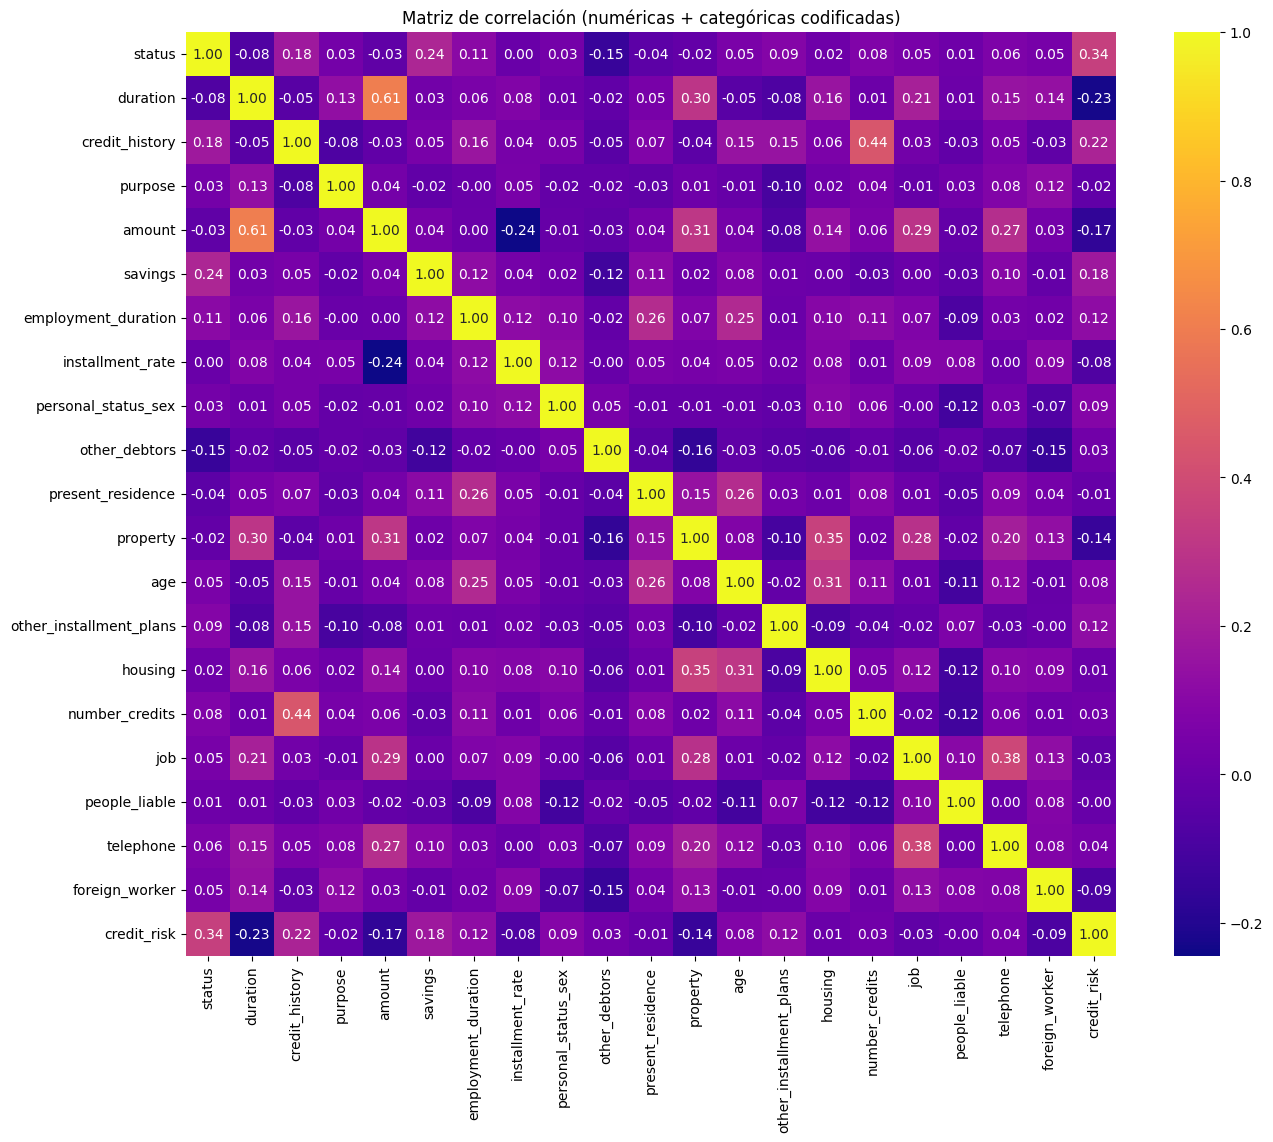

In [10]:
# =============================================================
# Matriz de correlación entre variables numéricas
# =============================================================
corr_matrix = df.corr()

# =============================================================
# Visualización de la matriz de correlación
# =============================================================
plt.figure(figsize=(15, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="plasma",
    fmt=".2f",
    cbar=True
)
plt.title("Matriz de correlación (numéricas + categóricas codificadas)")
plt.show()


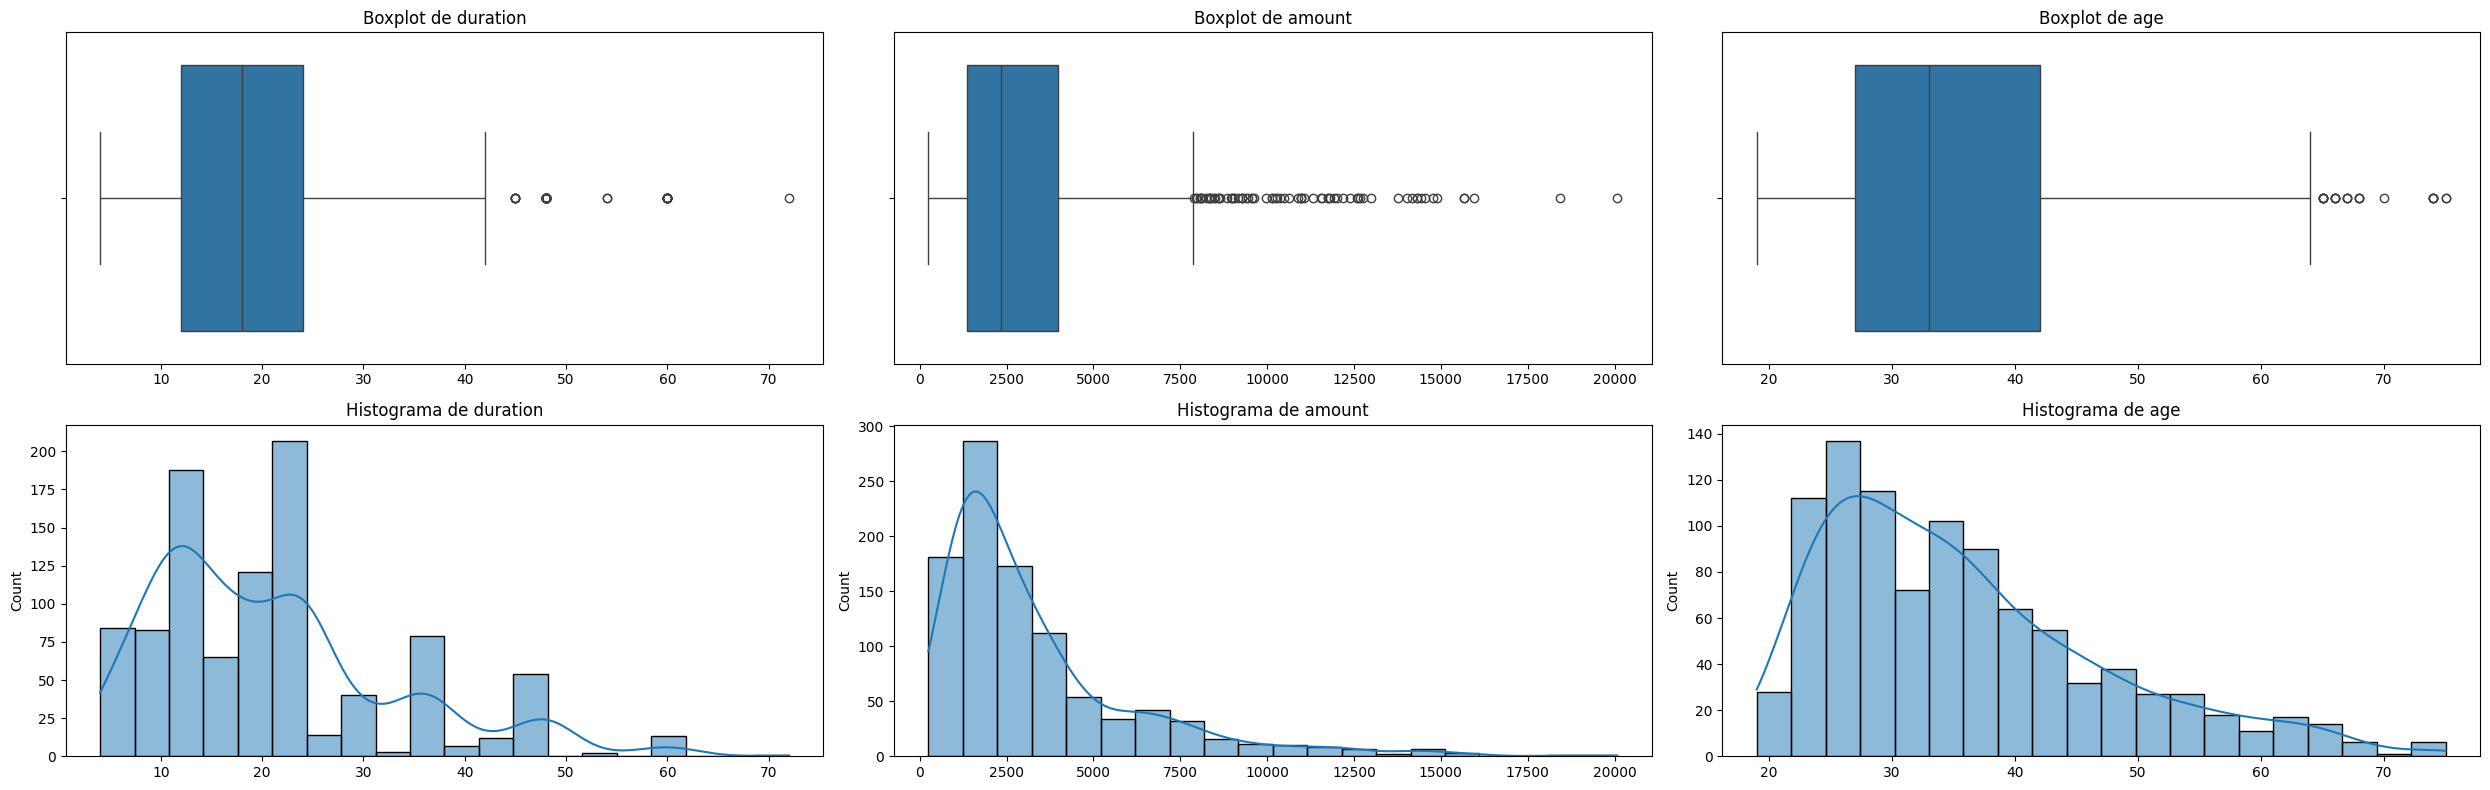

In [11]:
# =============================================================
# Visualización de distribución de variables numéricas
# =============================================================
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(25, 8))

# Recorrer cada variable numérica definida en num_col
for i, col in enumerate(num_col):
    row_box = (i // cols) * 2
    col_box = i % cols
    row_hist = row_box + 1

    # ---------------------------------------------------------
    # Boxplot: detectar outliers y rango intercuartílico
    # ---------------------------------------------------------
    sns.boxplot(x=df[col], ax=axes[row_box, col_box])
    axes[row_box, col_box].set_title(f"Boxplot de {col}")
    axes[row_box, col_box].set_xlabel("")

    # ---------------------------------------------------------
    # Histograma: distribución y densidad de probabilidad
    # ---------------------------------------------------------
    sns.histplot(df[col], kde=True, ax=axes[row_hist, col_box], bins=20)
    axes[row_hist, col_box].set_title(f"Histograma de {col}")
    axes[row_hist, col_box].set_xlabel("")

plt.tight_layout()
plt.show()


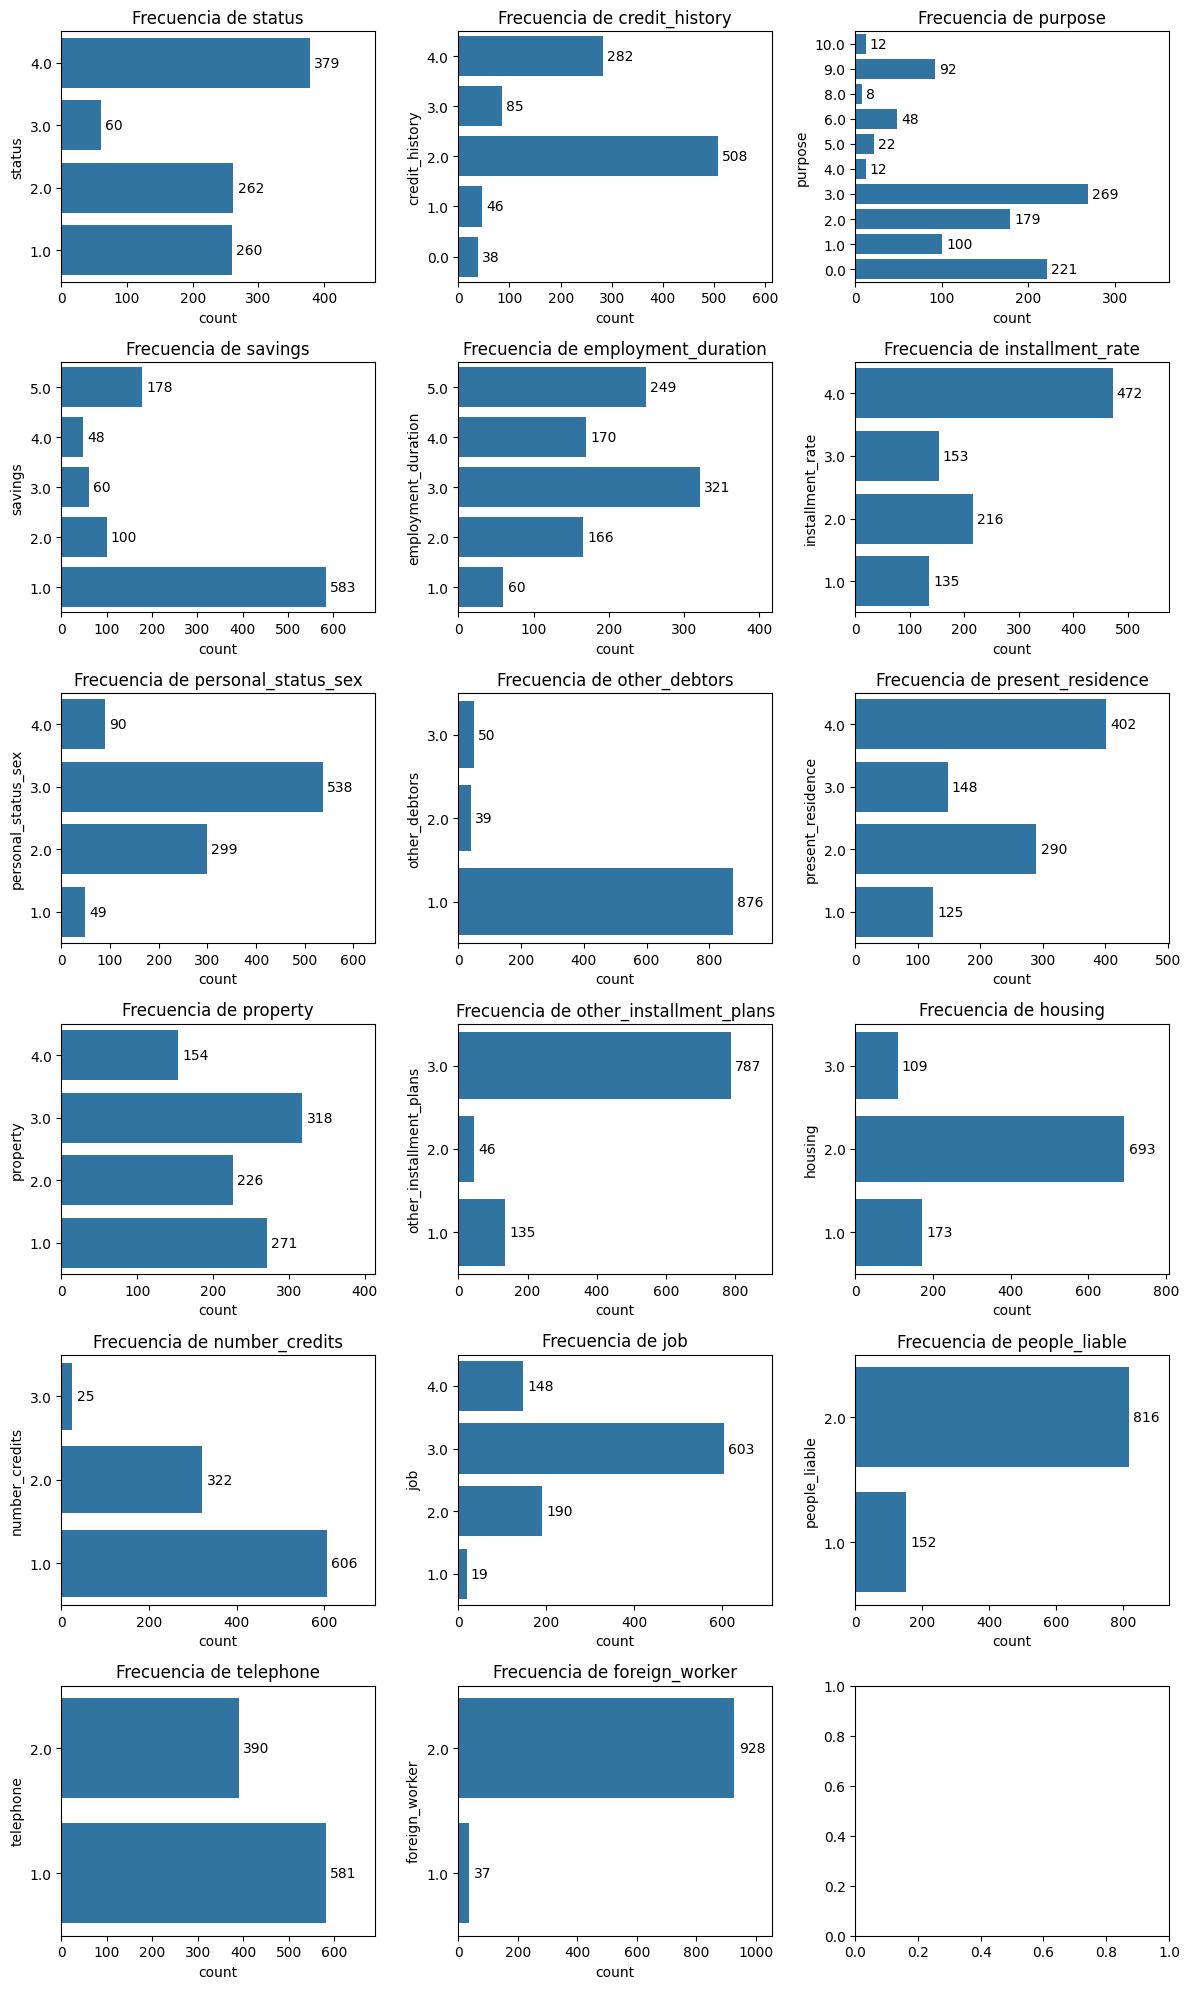

In [12]:
# =============================================================
# Visualización de distribución de variables categóricas
# =============================================================

# Seleccionar columnas categóricas (tipo object)
categorical_atts = df.select_dtypes(include=['object']).columns.tolist()

# Crear figura con subplots organizados en cuadrícula
fig, axes = plt.subplots(6, 3, figsize=(12, 20))
plt.subplots_adjust(wspace=.5, hspace=.5)
axes = axes.ravel()

# Recorrer y graficar cada variable categórica
for i, col in enumerate(categorical_atts):
    # ---------------------------------------------------------
    # Convertir categorías a valores numéricos (si es posible)
    # para ordenarlas de forma descendente
    # ---------------------------------------------------------
    categories = pd.to_numeric(df[col], errors="coerce").dropna().unique()
    order = sorted(categories, reverse=True)  # Orden descendente

    ax = axes[i]
    sns.countplot(
        y=pd.to_numeric(df[col], errors="coerce"),
        ax=ax,
        order=order
    )
    ax.set_title(f'Frecuencia de {col}')

    # ---------------------------------------------------------
    # Añadir etiquetas con el conteo al final de cada barra
    # ---------------------------------------------------------
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

    # Ajustar límite del eje X para evitar solapamiento
    xmin, xmax = ax.get_xlim()
    ax.set_xlim(xmin, xmax + 80)

plt.tight_layout()
plt.show()

In [13]:
# =============================================================
# Conteo de clases en la variable objetivo
# =============================================================
print(df['credit_risk'].value_counts())

credit_risk
1.0    689
0.0    303
Name: count, dtype: int64


In [14]:
# =============================================================
# Imputación de valores faltantes
# =============================================================

# -------------------------------------------------------------
# Rellenar columnas numéricas con la mediana
# -------------------------------------------------------------
for col in df.select_dtypes(include=["number"]).columns:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())

# -------------------------------------------------------------
# Rellenar columnas categóricas con la moda
# -------------------------------------------------------------
for col in df.select_dtypes(include=["object"]).columns:
    if df[col].isna().any():
        top = df[col].mode().iloc[0]
        df[col] = df[col].fillna(top)


In [15]:
# =============================================================
# Reiniciar índice del DataFrame
# =============================================================
df = df.reset_index(drop=True)


In [16]:
# =============================================================
# Verificar estructura final del DataFrame
# =============================================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   992 non-null    object 
 1   duration                 992 non-null    Float64
 2   credit_history           992 non-null    object 
 3   purpose                  992 non-null    object 
 4   amount                   992 non-null    Float64
 5   savings                  992 non-null    object 
 6   employment_duration      992 non-null    object 
 7   installment_rate         992 non-null    object 
 8   personal_status_sex      992 non-null    object 
 9   other_debtors            992 non-null    object 
 10  present_residence        992 non-null    object 
 11  property                 992 non-null    object 
 12  age                      992 non-null    Float64
 13  other_installment_plans  992 non-null    object 
 14  housing                  9

In [17]:
# =============================================================
# Guardar DataFrame procesado en formato Parquet
# =============================================================
df.to_parquet('trabajo_grupal_mlops/data/03_df_eda_01.parquet', index=False)

print("✅ DataFrame guardado exitosamente en '03_df_eda_01.parquet'")


✅ DataFrame guardado exitosamente en '03_df_eda_01.parquet'
